<a href="https://colab.research.google.com/github/Prakriti-dubey/Human-Activity-Recognition-Based-on-Residual-Network-and-BiLSTM/blob/main/HAR_Based_on_Residual_Network_and_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
#import keras_tuner as kt
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#Importing libraries
import sys 
import numpy
import xlrd #excel read
import os
import matplotlib.pyplot as plt
import io
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from scipy.signal import savgol_filter
from scipy import signal
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
 
from tensorflow import keras, convert_to_tensor, float32, make_ndarray
from tensorflow.compat.v1 import Session
from tensorflow.keras import layers, backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, GlobalAveragePooling1D, Dropout
from tensorflow.keras.layers import LSTM, GRU, Conv1D, MaxPooling1D, MaxPool1D, TimeDistributed, RepeatVector, Conv2D
from keras.layers.merge import concatenate
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import random
from sklearn.metrics import mean_absolute_error
RANDOM_SEED=42

In [2]:
COLUMN_NAMES = [ 'user','activity','timestamp','x-axis','y-axis','z-axis']
LABELS = ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/WISDM_ar_v1.1_raw.txt', header = None, names = COLUMN_NAMES)
#data=pd.read_csv('https://colab.research.google.com/drive/14wXuIewMAFIHSARx9P0BTNNLEoeUZC8c?usp=sharing', header = None, names = COLUMN_NAMES)
data = data.dropna() #remove row containing null value
data.head(5)

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [5]:
data['activity'].value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [6]:
data.head()
print('Total rows : ', len(data))

Total rows :  1098203


In [7]:
data.shape

(1098203, 6)

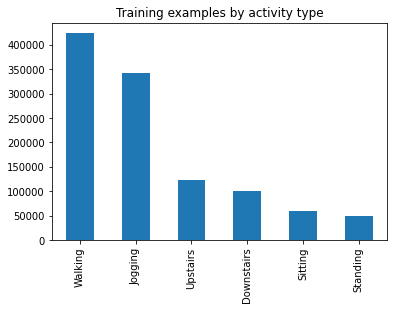

In [8]:
data['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x-axis     1098203 non-null  float64
 4   y-axis     1098203 non-null  float64
 5   z-axis     1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.7+ MB


In [10]:

# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'

data['x-axis'] = data['x-axis'] / data['x-axis'].max()
data['y-axis'] = data['y-axis'] / data['y-axis'].max()
data['z-axis']=data['z-axis'].str.replace(';','')
data['z-axis'] = data['z-axis'].apply(lambda x:float(x))
data['z-axis'] = data['z-axis'] / data['z-axis'].max()
# Round numbers
data = data.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

In [11]:

N_TIME_STEPS = 200
N_FEATURES = 3

step = 20
segments = []
labels = []
for i in range(0, len(data) - N_TIME_STEPS, step):
    xs = data['x-axis'].values[i: i + N_TIME_STEPS]
    ys = data['y-axis'].values[i: i + N_TIME_STEPS]
    zs = data['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(data['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

In [12]:

reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)

In [13]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [14]:

print(reshaped_segments.shape)
print(labels[0])

(54901, 200, 3)
[0. 1. 0. 0. 0. 0.]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)

In [16]:
print('X_train : ', len(X_train))
print('X_test : ', len(X_test))

X_train :  38430
X_test :  16471


In [17]:
verbose = 1
epochs = 20
batch_size = 400

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = y_train.shape[1]

print('n_timesteps : ', n_timesteps)
print('n_features : ', n_features)
print('n_outputs : ', n_outputs)


n_timesteps :  200
n_features :  3
n_outputs :  6


In [18]:
input_shape = X_train.shape

In [50]:
import tensorflow as tf

In [95]:
inputs = tf.keras.Input(shape=(X_train.shape))
y = tf.keras.layers.Conv2D( 32, (2,2),2, padding="same")(inputs)

In [96]:
y=tf.keras.layers.BatchNormalization()(y)

In [97]:
y=tf.keras.activations.relu(y)

In [98]:
y = tf.keras.layers.Conv2D( 32, (2,2), padding="same")(y)

In [99]:
y=tf.keras.layers.BatchNormalization()(y)


In [100]:
model=keras.Model(inputs, y)

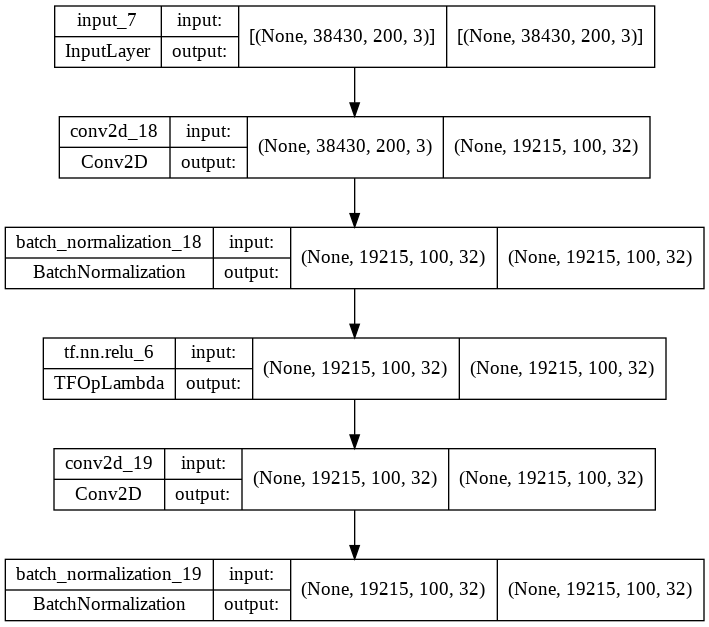

In [101]:
keras.utils.plot_model(model, show_shapes=True)

In [135]:
y1 = tf.keras.layers.Conv2D( 32, (1,1),2)(inputs)

In [136]:
y1=tf.keras.layers.BatchNormalization()(y1)

In [137]:
model=keras.Model(inputs, y1)

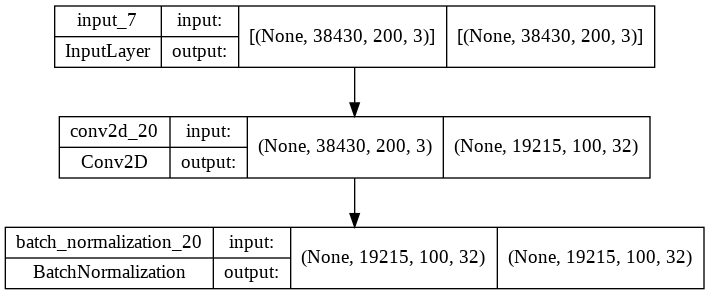

In [138]:
keras.utils.plot_model(model, show_shapes=True)

In [144]:
merge = tf.keras.layers.Concatenate()([y1, y])

In [145]:
merge=tf.keras.activations.relu(merge)

In [146]:
merge=tf.keras.layers.Dropout(0.5)(merge)


In [147]:
flat=tf.keras.layers.Flatten()
merge = tf.keras.layers.TimeDistributed(flat)(merge)

In [148]:
merge.shape

TensorShape([None, 19215, 6400])

In [149]:
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(merge)

In [150]:
drop_out = tf.keras.layers.Dropout(.5)
x = tf.keras.layers.TimeDistributed(drop_out)(x)

In [151]:
x = layers.Dense(128, activation="sigmoid")(x)

In [152]:
x = tf.keras.layers.Softmax()(x)

In [153]:
x.shape

TensorShape([None, 19215, 128])

In [154]:
model=keras.Model(inputs, x)

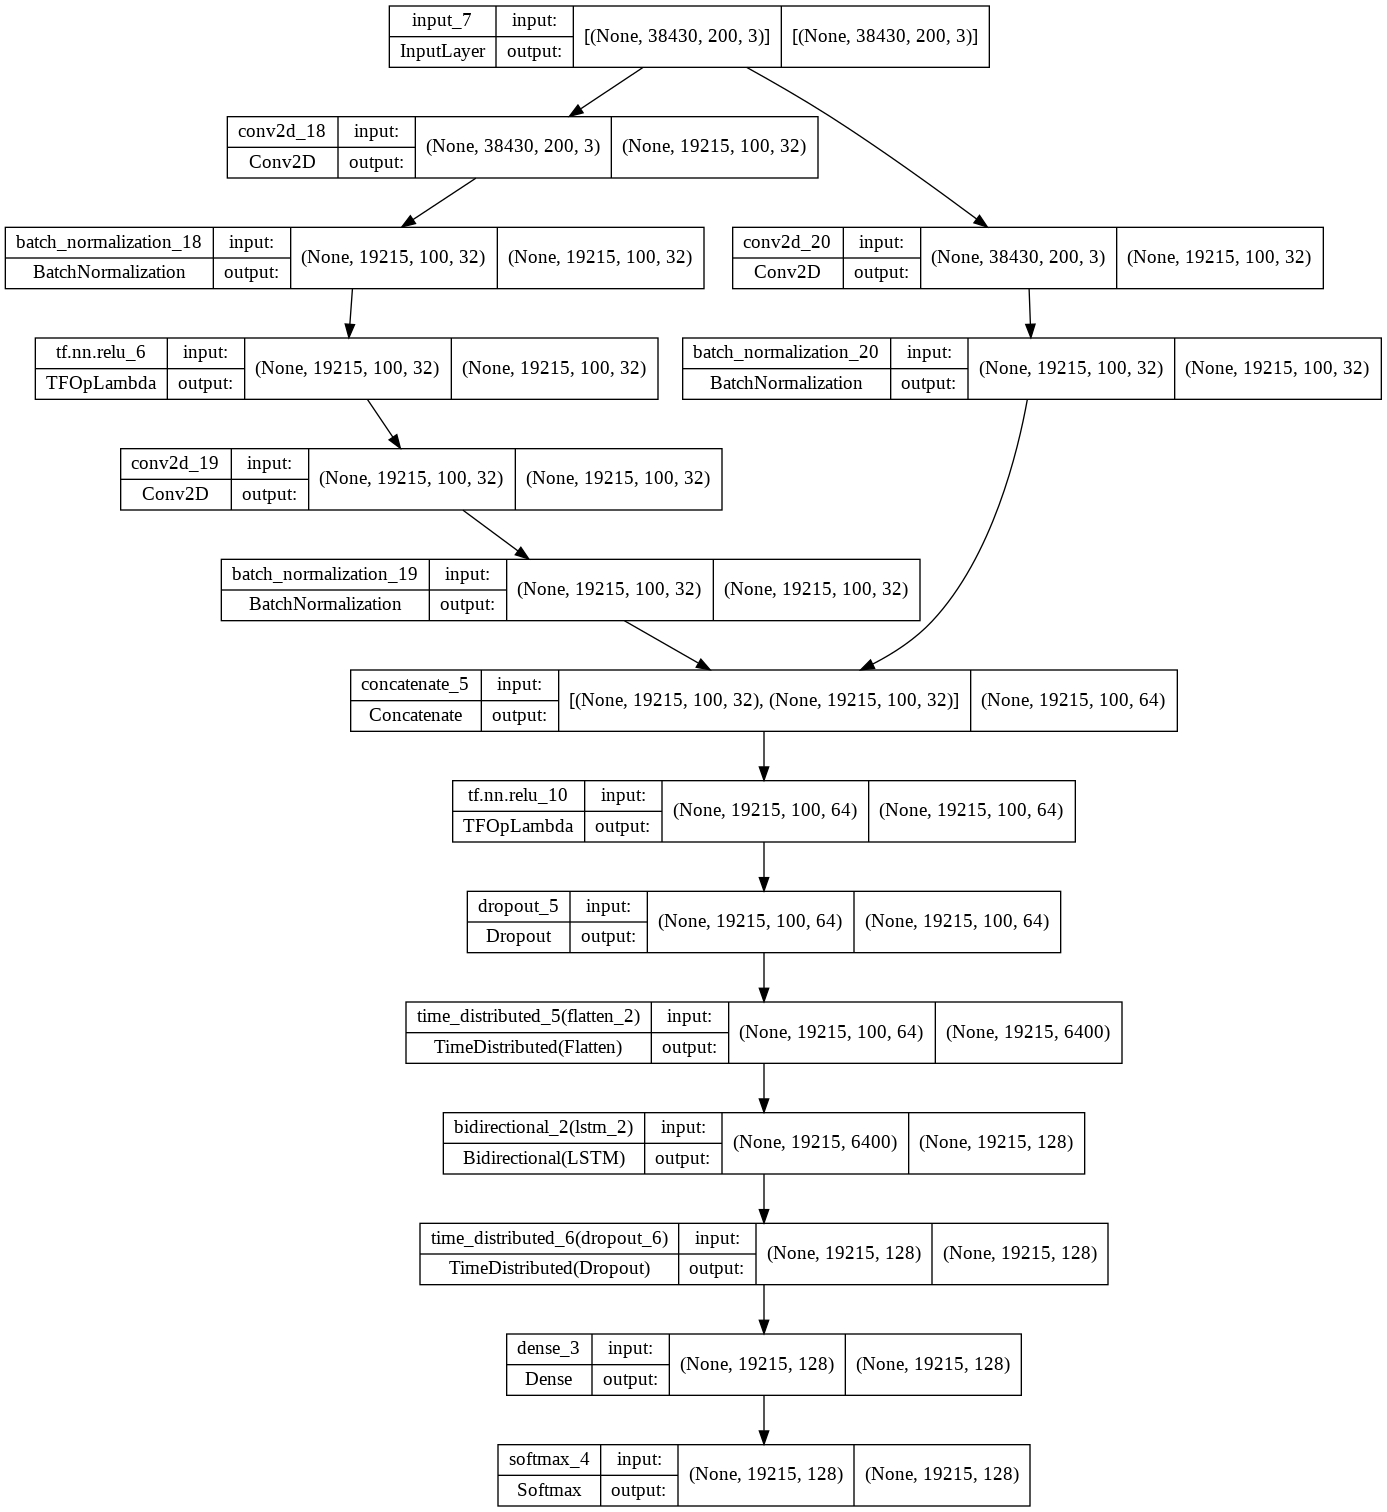

In [155]:
keras.utils.plot_model(model, show_shapes=True)